# 三角板关键点检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 进入mmdetection主目录

In [1]:
import os
os.chdir('mmpose')

## 导入工具包

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [3]:
# 日志文件路径
log_path = 'work_dirs/rtmpose-s-ear/20230606_014111/vis_data/scalars.json'

In [4]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [5]:
len(json_list)

1830

In [6]:
eval(json_list[4])

{'lr': 0.0008421368421052633,
 'data_time': 6.842582178115845,
 'loss': 0.41693543195724486,
 'loss_kpt': 0.41693543195724486,
 'acc_pose': 0.12053571428571429,
 'time': 7.938326644897461,
 'epoch': 1,
 'memory': 1652,
 'step': 5}

In [8]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:01<00:00, 1683.06it/s]


In [9]:
df_train

,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,memory,step
0,4.000000e-08,8.268574,0.421716,0.421716,0.010417,12.223502,1.0,1608.0,1.0
1,2.105642e-04,6.103460,0.422191,0.422191,0.007440,8.244830,1.0,1652.0,2.0
2,4.210884e-04,6.537026,0.422775,0.422775,0.017857,8.096329,1.0,1652.0,3.0
3,6.316126e-04,6.714813,0.421544,0.421544,0.034226,7.971284,1.0,1652.0,4.0
4,8.421368e-04,6.842582,0.416935,0.416935,0.120536,7.938327,1.0,1652.0,5.0
...,...,...,...,...,...,...,...,...,...
1795,2.002894e-04,6.288713,0.027258,0.027258,1.000000,6.619347,300.0,1652.0,1796.0
1796,2.001852e-04,6.273805,0.027298,0.027298,0.998512,6.602264,300.0,1652.0,1797.0
1797,2.001042e-04,6.278090,0.027376,0.027376,0.995536,6.608062,300.0,1652.0,1798.0
1798,2.000463e-04,6.275369,0.027353,0.027353,0.997024,6.605165,300.0,1652.0,1799.0


In [10]:
df_test

,coco/AP,coco/AP .5,coco/AP .75,coco/AP (M),coco/AP (L),coco/AR,coco/AR .5,coco/AR .75,coco/AR (M),coco/AR (L),PCK,AUC,NME,data_time,time,step
0,0.000424,0.004243,0.000000,-1.0,0.000424,0.002381,0.023810,0.000000,-1.0,0.002381,0.287982,0.006293,0.267409,1.244353,1.339820,10.0
1,0.035258,0.213157,0.000000,-1.0,0.035258,0.078571,0.380952,0.000000,-1.0,0.078571,0.520408,0.015533,0.123365,1.035564,1.119578,20.0
2,0.042690,0.191382,0.000000,-1.0,0.042690,0.054762,0.238095,0.000000,-1.0,0.054762,0.403628,0.015193,0.148459,1.016180,1.086664,30.0
3,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,1.049991,1.021090,1.088930,40.0
4,0.430949,0.967468,0.157137,-1.0,0.430949,0.480952,0.976190,0.333333,-1.0,0.480952,0.846939,0.043537,0.067793,1.023152,1.097978,50.0
5,0.106559,0.381594,0.014851,-1.0,0.106559,0.119048,0.404762,0.023810,-1.0,0.119048,0.441043,0.016667,0.291516,1.064146,1.113991,60.0
6,0.419765,0.942912,0.223655,-1.0,0.419765,0.480952,0.952381,0.404762,-1.0,0.480952,0.850340,0.049773,0.067089,1.049046,1.120735,70.0
7,0.590317,1.000000,0.688892,-1.0,0.590317,0.628571,1.000000,0.785714,-1.0,0.628571,0.935374,0.063265,0.055207,1.047550,1.118209,80.0
8,0.363986,1.000000,0.168167,-1.0,0.363986,0.414286,1.000000,0.285714,-1.0,0.414286,0.802721,0.047449,0.072177,1.043176,1.115843,90.0
9,0.315442,0.801238,0.205621,-1.0,0.315442,0.345238,0.833333,0.238095,-1.0,0.345238,0.723356,0.036848,0.082838,1.060907,1.130016,100.0


## 导出训练日志表格

In [11]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [11]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [12]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [12]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


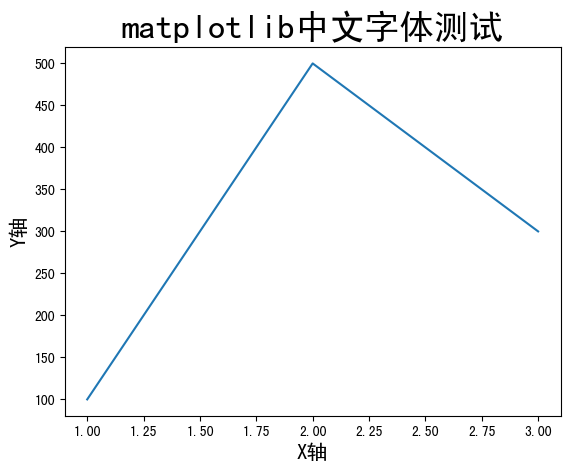

In [13]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [14]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [15]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'memory', 'step'],
      dtype='object')

In [16]:
metrics = ['loss', 'loss_kpt']

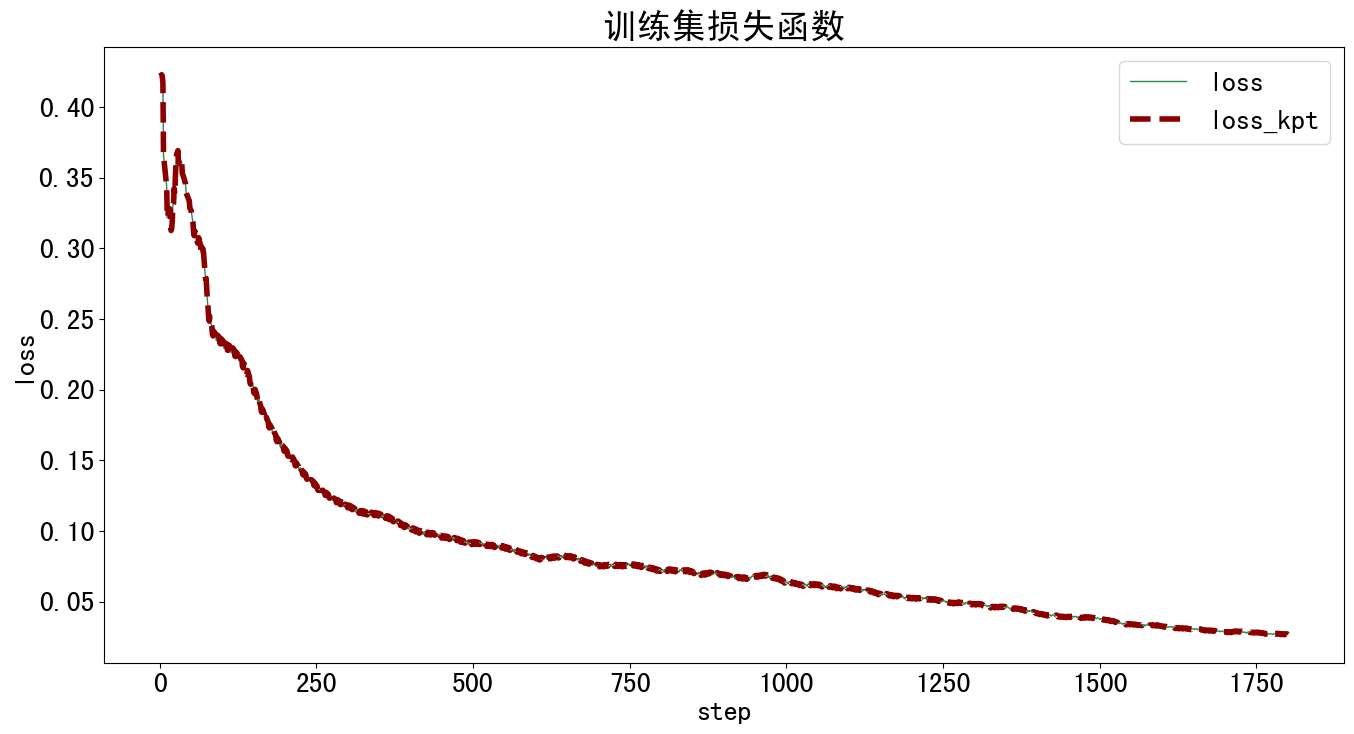

In [17]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [18]:
metrics = ['acc_pose']

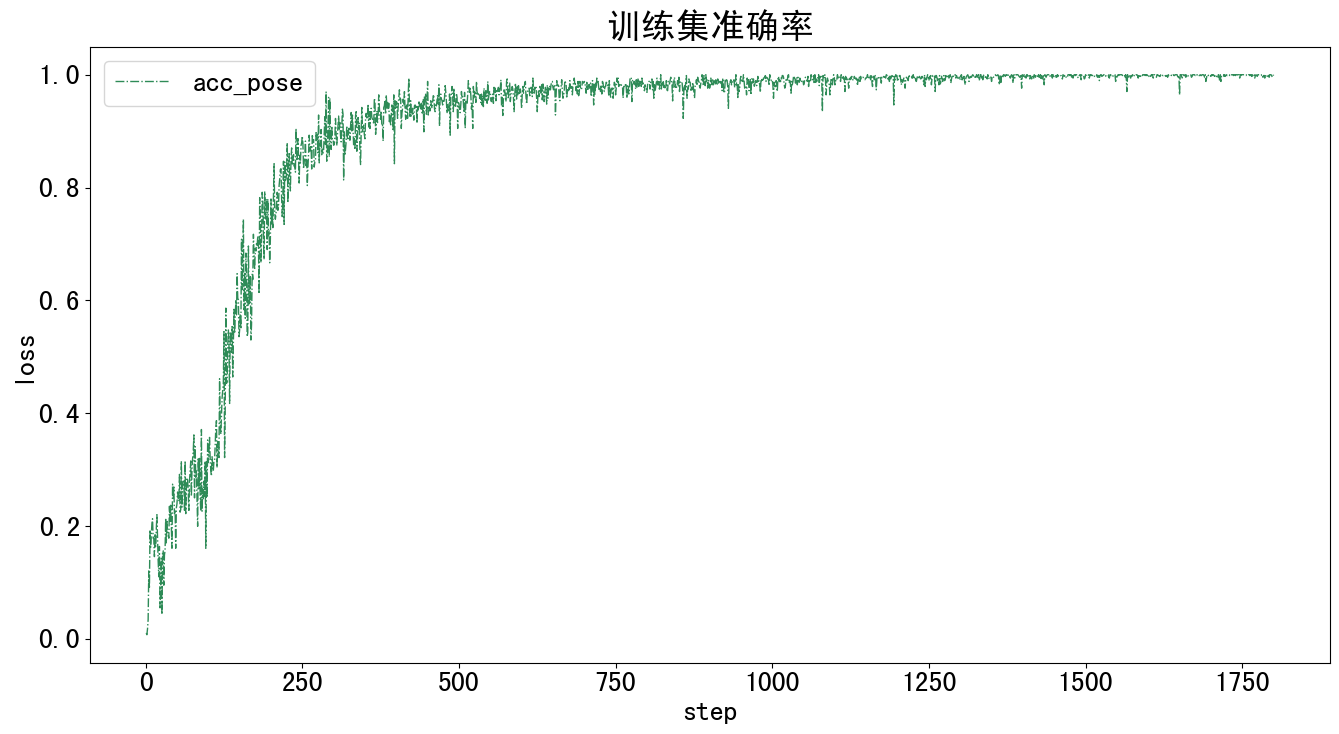

In [19]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [20]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

In [21]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)', 'PCK', 'AUC']


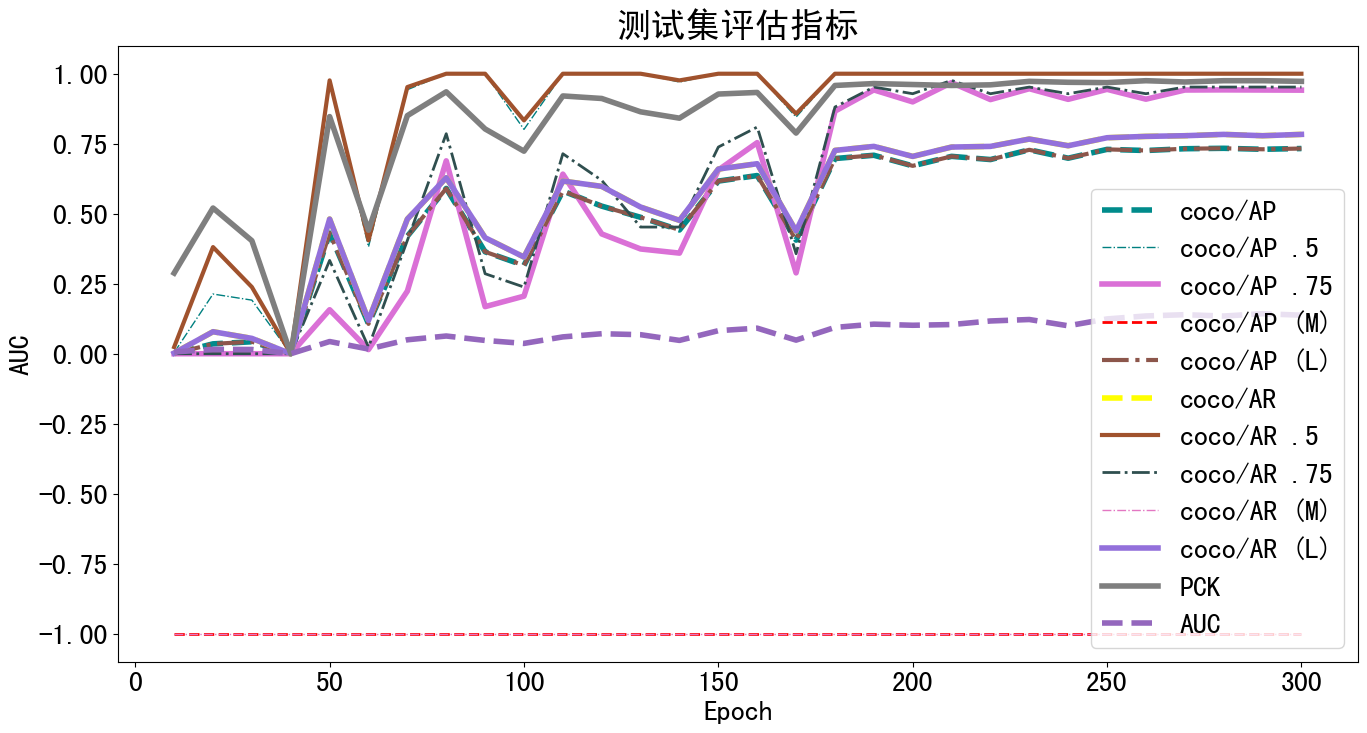

In [22]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-NME

In [23]:
metrics = ['NME']

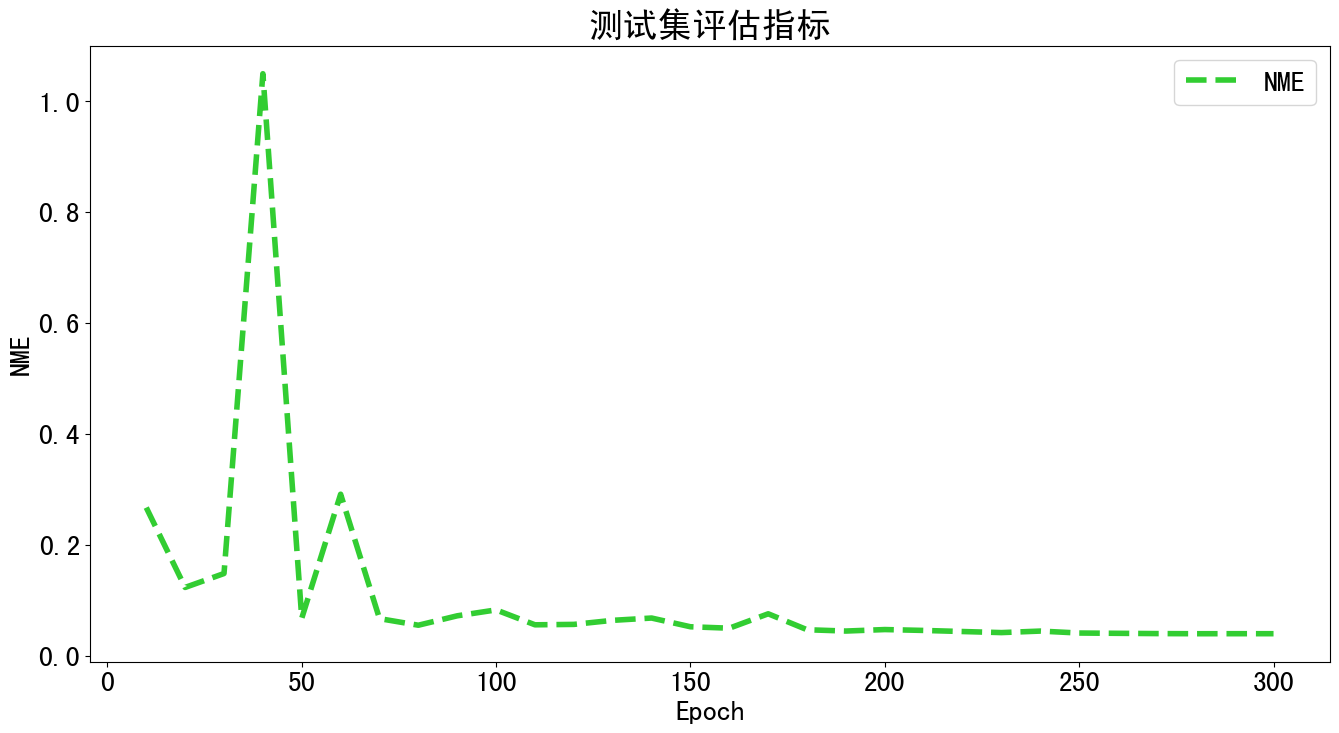

In [24]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()